In [15]:
import pandas as pd
import glob

In [16]:
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [17]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [18]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [19]:
fp['AtomPairs2D']

'AtomPairs2DFingerprinter.xml'

In [20]:
df = pd.read_csv('Aromatase_df_final.csv')

In [21]:
df.head()

,Unnamed: 0,Unnamed: 0.1,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,inactive,329.528,4.28820,2.0,2.0,5.148742
1,1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,active,315.501,3.89810,2.0,2.0,4.301030
2,2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606


In [22]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [23]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,inactive,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,active,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
1947,CHEMBL2165315,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2C,active,268.316,2.66620,0.0,3.0,7.309804
1948,CHEMBL2165314,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2,active,254.289,2.64190,1.0,3.0,6.349692
1949,CHEMBL446083,CN1C(=O)CCc2cc(-c3cccnc3)ccc21,active,238.290,2.65760,0.0,2.0,6.370590
1950,CHEMBL2165313,O=C1CCc2cc(-c3cccnc3)c(O)cc2N1,active,240.262,2.33890,2.0,3.0,5.512437


In [24]:
df2 = pd.concat( [df['canonical_smiles'],df['molecule_chembl_id']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,canonical_smiles,molecule_chembl_id
0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,CHEMBL341591
1,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,CHEMBL2111947
2,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,CHEMBL431859
3,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,CHEMBL113637
4,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,CHEMBL112021
...,...,...
1947,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2C,CHEMBL2165315
1948,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2,CHEMBL2165314
1949,CN1C(=O)CCc2cc(-c3cccnc3)ccc21,CHEMBL446083
1950,O=C1CCc2cc(-c3cccnc3)c(O)cc2N1,CHEMBL2165313


In [25]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [27]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [152]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL341591,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,CHEMBL2165315,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1948,CHEMBL2165314,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949,CHEMBL446083,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950,CHEMBL2165313,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
X = descriptors.drop('Name', axis=1)
y = df['pIC50']

In [154]:
dataset = pd.concat([X,y],axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.309804
1948,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.349692
1949,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.370590
1950,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.512437


In [155]:
dataset.to_csv('Aromatase_Fp_with_PIC50.csv',index=False)

In [156]:
import seaborn as sns

In [157]:
aroma = pd.read_csv('Aromatase_Fp_with_PIC50.csv')

In [158]:
X = aroma.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1948,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1949,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1950,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [159]:
y = aroma.pIC50

In [160]:
y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
1947    7.309804
1948    6.349692
1949    6.370590
1950    5.512437
1951    5.301030
Name: pIC50, Length: 1952, dtype: float64

In [161]:
X.shape

(1952, 881)

In [162]:
y.shape

(1952,)

In [163]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP756,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP860
0,1,1,1,0,0,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
1,1,1,1,0,0,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1,1,1,1,0,1,1,0,0,0,...,1,0,1,1,1,0,0,0,1,0
1948,0,0,1,1,0,1,1,0,0,0,...,1,0,1,1,1,0,0,0,1,0
1949,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1950,0,0,1,1,0,1,1,0,0,0,...,1,0,1,1,1,0,0,0,1,0


In [164]:
from sklearn.model_selection import train_test_split

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()

In [167]:
scaler.fit(X)

StandardScaler()

In [168]:
scaled = scaler.transform(X)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2)

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
model = RandomForestRegressor(n_estimators=200)

In [181]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [182]:
r2 = model.score(X_test, y_test)
r2

0.5246820783374577

In [183]:
pred = model.predict(X_test)

In [175]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

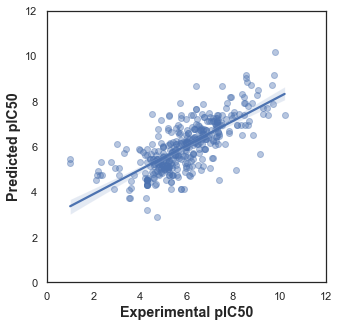

In [176]:

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show